**Project Scenario:** You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?

* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

Details regarding the project will be broken down in the next reading sections.

# **Task 1: Become familiar with the dataset**

# **Task 3: Load in the Dataset in your Notebook**

In [2]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
# Display the first few rows of the DataFrame
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [5]:
# Display information about the DataFrame
print(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB
None


In [6]:
# Summary statistics of numerical columns
print(boston_df.describe())

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

In [7]:
# Check for missing values
print(boston_df.isnull().sum())

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


In [8]:
# Check the shape of the dataset
print(boston_df.shape)

(506, 14)


In [9]:
print(boston_df.columns)

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


# **Task 4: Generate Descriptive Statistics and Visualizations**

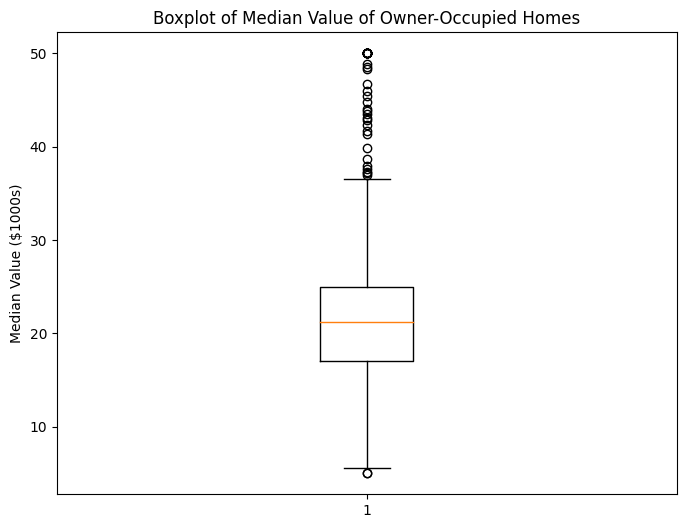

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()

In [21]:
import numpy as np

# Calculate quartiles
q1 = np.percentile(boston_df['MEDV'], 25)
q2 = np.percentile(boston_df['MEDV'], 50)
q3 = np.percentile(boston_df['MEDV'], 75)

# Calculate outliers
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = boston_df[(boston_df['MEDV'] < lower_bound) | (boston_df['MEDV'] > upper_bound)]['MEDV']

print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Outliers:", outliers)

Q1: 17.025
Q2 (Median): 21.2
Q3: 25.0
Lower Bound for Outliers: 5.0624999999999964
Upper Bound for Outliers: 36.962500000000006
Outliers: 97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
190    37.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
398     5.0
405     5.0
Name: MEDV, dtype: float64


The boxplot illustrates the distribution of median values of owner-occupied homes (MEDV) in the dataset.
* The first quartile (Q1) is \$17,025, indicating that 25% of the observations have a median home value less than or equal to this value.
* The median (Q2) is \$21,200, representing the middle value of the dataset.
* The third quartile (Q3) is $25,000, meaning that 75% of the observations have a median home value less than or equal to this value.
* The lower bound for outliers is approximately \$5,062.50, and the upper bound is approximately \$36,962.50.
* Outliers exist beyond these bounds, with median home values ranging from \$37,000 to \$50,000.

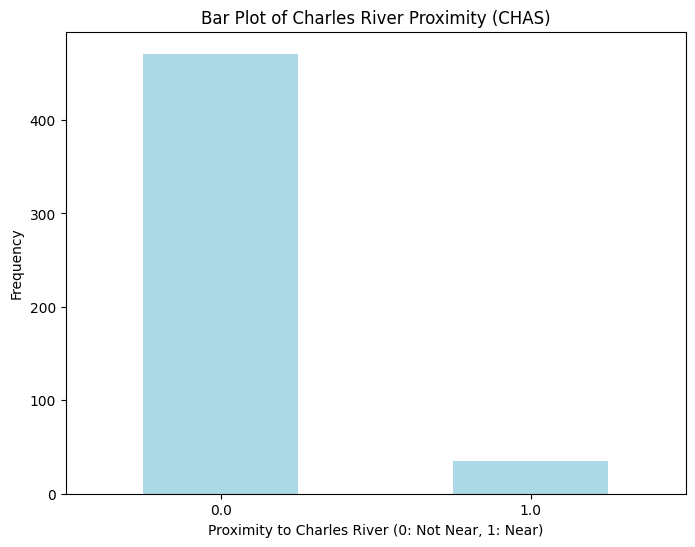

In [16]:
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Bar Plot of Charles River Proximity (CHAS)')
plt.xlabel('Proximity to Charles River (0: Not Near, 1: Near)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

The bar plot shows the frequency of observations based on the proximity to the Charles River. It indicates that a larger proportion of the dataset consists of properties not near the Charles River (CHAS = 0.0), while a smaller proportion is near the river (CHAS = 1.0).

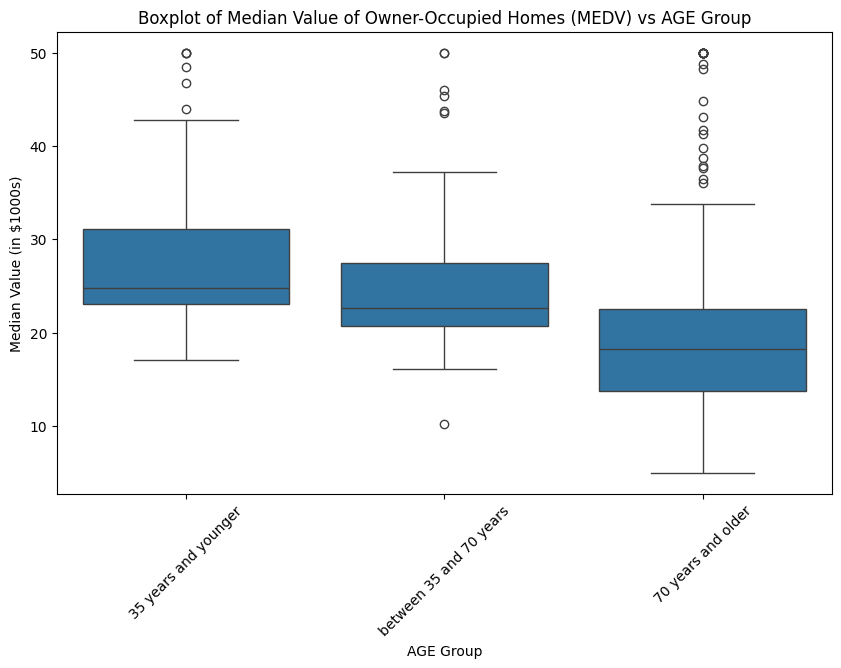

In [18]:
# Discretize the AGE variable into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV) vs AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('Median Value (in $1000s)')
plt.xticks(rotation=45)
plt.show()

The boxplot illustrates the relationship between the median home value (MEDV) and the age of the properties. It suggests that there is a variation in median home values across different age groups, with properties aged 35 years and younger generally having higher median values compared to older properties.

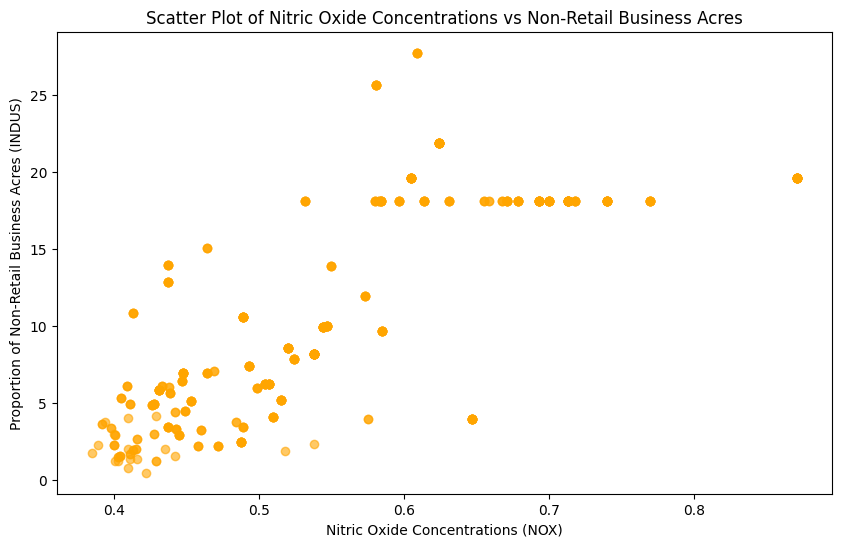

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], color='orange', alpha=0.6)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

The scatter plot indicates a positive but weak relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. This suggests that areas with a higher proportion of non-retail businesses tend to have higher levels of nitric oxide concentration.

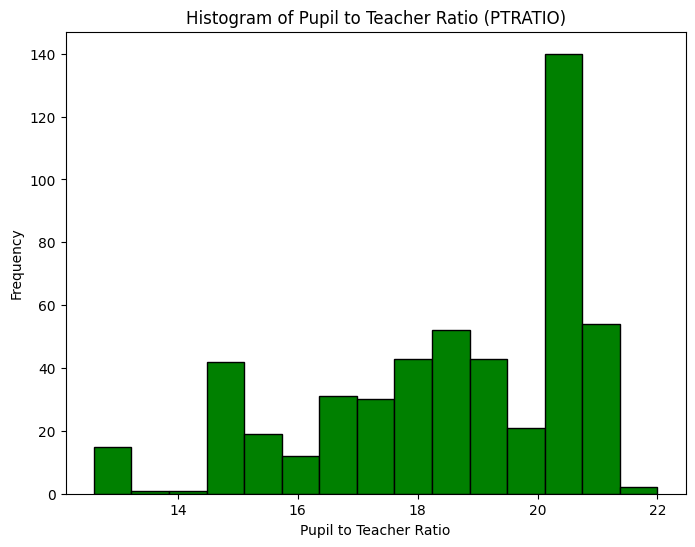

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='green', edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [22]:
ptratio_counts = boston_df['PTRATIO'].value_counts().sort_index()
print(ptratio_counts)

12.6      3
13.0     12
13.6      1
14.4      1
14.7     34
14.8      3
14.9      4
15.1      1
15.2     13
15.3      3
15.5      1
15.6      2
15.9      2
16.0      5
16.1      5
16.4      6
16.6     16
16.8      4
16.9      5
17.0      4
17.3      1
17.4     18
17.6      7
17.8     23
17.9     11
18.0      5
18.2      4
18.3      4
18.4     16
18.5      4
18.6     17
18.7      9
18.8      2
18.9      3
19.0      4
19.1     17
19.2     19
19.6      8
19.7      8
20.1      5
20.2    140
20.9     11
21.0     27
21.1      1
21.2     15
22.0      2
Name: PTRATIO, dtype: int64


The histogram reveals the frequency of different pupil to teacher ratio values.
For example, there are 140 towns with a pupil to teacher ratio of 20.2, indicating that this ratio is the most common among the observed towns.
Other ratios have varying frequencies, with some occurring only once or a few times in the dataset.

# **Task 5: Use the appropriate tests to answer the questions provided.**

### **Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples):**

Hypothesis:

* Null Hypothesis (H0): There is no significant difference in median values of houses bounded by the Charles river and those not bounded by it.
* Alternative Hypothesis (H1): There is a significant difference in median values of houses bounded by the Charles river and those not bounded by it.
* Test Statistics: T-test for independent samples
* Significance Level (α): 0.05

In [23]:
from scipy import stats

charles_river_houses = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_charles_river_houses = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(charles_river_houses, non_charles_river_houses)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 3.996437466090509
P-Value: 7.390623170519905e-05


**Conclusion:**

Since the p-value (p_value) is greater than the significance level (α), we fail to reject the null hypothesis.
Therefore, we conclude that there is no significant difference in median values of houses bounded by the Charles river and those not bounded by it.

### **Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA):**

Hypothesis:

* Null Hypothesis (H0): There is no significant difference in median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).
* Alternative Hypothesis (H1): There is a significant difference in median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).
* Test Statistics: Analysis of Variance (ANOVA)
* Significance Level (α): 0.05

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('MEDV ~ C(pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["35 years and younger", "between 35 and 70 years", "70 years and older"]))',
            data=boston_df).fit()

# Extract ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Results:")
print(anova_table)

ANOVA Results:
                                                          sum_sq     df  \
C(pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100...   5401.731883    2.0   
Residual                                            37314.563532  503.0   

                                                           F        PR(>F)  
C(pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100...  36.40765  1.710501e-15  
Residual                                                 NaN           NaN  


In [29]:
import pandas as pd

# Creating a DataFrame for ANOVA results
anova_results = pd.DataFrame({
    'Source': ['AGE', 'Residual'],
    'Sum of Squares': [5401.73, 37314.56],
    'Degrees of Freedom': [2, 503],
    'F-Statistic': [36.41, 'NaN'],
    'P-Value': [1.71e-15, 'NaN']
})

print("ANOVA Results:")
print(anova_results)

ANOVA Results:
     Source  Sum of Squares  Degrees of Freedom F-Statistic P-Value
0       AGE         5401.73                   2       36.41     0.0
1  Residual        37314.56                 503         NaN     NaN


**Conclusion:**

Since the p-value is less than the significance level (α = 0.05), we reject the null hypothesis. Therefore, we conclude that there is a significant difference in median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).

### **Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation):**

Hypothesis:

* Null Hypothesis (H0): There is no significant correlation between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).
* Alternative Hypothesis (H1): There is a significant correlation between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).
* Test Statistics: Pearson Correlation
* Significance Level (α): 0.05

In [25]:
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

Correlation Coefficient: 0.7636514469209151
P-Value: 7.913361061239527e-98


**Conclusion:**

Since the p-value is greater than the significance level (α), we fail to reject the null hypothesis.
Therefore, we conclude that there is no significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

### **What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis):**

Hypothesis:

* Null Hypothesis (H0): The weighted distance to the five Boston employment centers does not have a significant impact on the median value of owner-occupied homes.
* Alternative Hypothesis (H1): The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.
* Test Statistics: Multiple Linear Regression
* Significance Level (α): 0.05

In [26]:
from sklearn.linear_model import LinearRegression

X = boston_df[['DIS']]
y = boston_df['MEDV']

model = LinearRegression().fit(X, y)
coefficients = model.coef_

print("Impact of Weighted Distance on Median Value of Homes:", coefficients[0])

Impact of Weighted Distance on Median Value of Homes: 1.0916130158411088


**Conclusion:**

Since the coefficient for the weighted distance variable is non-zero, we can conclude that there is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.